## Final Project: Linear Regression

- We want to present the relationship between (two) variables linearly

- For example, recall the running distance and drinking water 

- We are interested to obtain the best line describing by `y_pred[i] = w_1 * x[i] + w_0` that maps running distance to drinking water

- Below, list `x` represents running distance in miles and list `y` represents the drinking water in litres 

Text(0, 0.5, 'Water Drinks (Litre)')

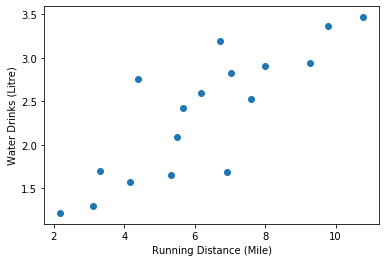

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Running Distance in Mile
x = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

# Water Drinks in Litre
y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

plt.scatter(x, y)
plt.xlabel('Running Distance (Mile)')
plt.ylabel('Water Drinks (Litre)')

## In order to obtain the best line, we should define error first

- For linear relationship, mean-square-error (MSE) represents if is it a good line (good model) or not 

- $y[i]$ and $y_{pred}[i]$ are i-th element of list `y` and list `y_pred` respectively where `y_pred[i] = w_1 * x[i] + w_0`

- Define error as: $E[i] = y_{pred}[i] - y[i]$

- Define mean-square-error as: $MSE = \frac{1}{N} \sum_{i=0}^{N-1} E[i]^2$

- Also mean-square-error is equal to: $MSE = \frac{1}{N} \sum_{i=0}^{N-1} (y_{pred}[i] - y[i])^2$ 

- The parameter $N$ is: $N = len(y)$

### Question 1: Obtain the MSE for the following two lines:

1- `y_pred[i] = 0.7*x[i] + 0.3`

2- `y_pred[i] = 0.25163494*x[i] + 0.79880123`

Hint: Your function take four input arguments: 1- y, 2- x, 3- slope, 4-intercept

In [26]:
def min_sq_error(y, x, w1, w0):
    y_pred = [w1*i + w0 for i in x]
    sum_squared_error = sum([(y_pred[i] - y[i])**2 for i in range(len(y))])
    N = len(y)
    mse = sum_squared_error/N
    return mse

print(min_sq_error(y, x, 0.7, 0.3))
print(min_sq_error(y, x, 0.25163494, 0.79880123))

6.518593101764703
0.15385767404191164


## Question 2: Obtain the best line (Coding is not required)

- In order the best line, we want to obtain which slope ($w_1$) and intercept ($w_0$) minimize the mean-square-error (MSE)

- Mathematically:

    - $MSE = \frac{1}{N} \sum_{i=0}^{N-1} (y_{pred}[i] - y[i])^2$ 

    - $MSE = f(w_1, w_0)= \frac{1}{N} \sum_{i=0}^{N-1} (w_1x[i] + w_0 - y[i])^2$ 

The steps in order to obtain the best line: 

### Compute $\frac{\partial MSE}{\partial w_1}$ 
   
- $ f(u) = u^2 $  

    - $ \frac{d}{du}\left(u^2\right) = 2u $  


- $ u = g(w_1, w_0) = w_1x[i] + w_0 - y[i] $
    - $ \frac{d}{dw_1} = x[i] $

$\frac{\partial MSE}{\partial w_1} $  

= $ \frac{1}{N} \sum_{i=0}^{N-1} \frac{d}{du} \cdot \frac{d}{dw_1} $ 

= $ \frac{1}{N} \sum_{i=0}^{N-1} 2u \cdot x[i] $  

= $ \frac{1}{N} \sum_{i=0}^{N-1} 2(w_1x[i] + w_0 - y[i]) \cdot x[i] $  

= $ \frac{2}{N} \sum_{i=0}^{N-1} (w_1x[i] + w_0 - y[i]) \cdot x[i] $  

= $ w_1\overline{x^2} + w_0\overline{x} - \overline{xy} $

### Compute $\frac{\partial MSE}{\partial w_0}$
   
- $ f(u) = u^2 $  

    - $ \frac{d}{du}\left(u^2\right) = 2u $  


- $ u = g(w_1, w_0) = w_1x[i] + w_0 - y[i] $
    - $ \frac{d}{dw_0} = 1 $

$\frac{\partial MSE}{\partial w_1} $  

= $ \frac{1}{N} \sum_{i=0}^{N-1} \frac{d}{du} \cdot \frac{d}{dw_0} $ 

= $ \frac{1}{N} \sum_{i=0}^{N-1} 2u \cdot 1 $  

= $ \frac{1}{N} \sum_{i=0}^{N-1} 2(w_1x_i + w_0 - y_i) \cdot 1 $  

= $ \frac{2}{N} \sum_{i=0}^{N-1} (w_1x_i + w_0 - y_i) $ 

= $ w_1\overline{x} + w_0 - \overline{y} $

### Then obtain $w_1$ and $w_0$ such that:

$\frac{\partial MSE}{\partial w_0} = 0$  

$ 0 = \frac{2}{N} \sum_{i=0}^{N-1} (w_1x[i] + w_0 - y[i]) $  

$ 0 = \sum_{i=0}^{N-1} (w_1x[i] + w_0 - y[i]) $

$ w_0 = \sum_{i=0}^{N-1} (y[i] - w_1x[i]) $

$ w_0 = \overline{y} - w_1\overline{x} $

$\frac{\partial MSE}{\partial w_1} = 0$  

$ 0 = w_1\overline{x^2} + w_0\overline{x} - \overline{xy} $  

$ 0 = w_1\overline{x^2} + \overline{x}(\overline{y} - w_1\overline{x}) - \overline{xy} $  

$ 0 = w_1\overline{x^2} + \bar{x}\bar{y} - w_1\bar{x}^2 - \overline{xy} $  

$ 0 = w_1(\overline{x^2} - \bar{x}^2) + \bar{x}\bar{y} - \overline{xy} $  

$ \overline{xy} - \bar{x}\bar{y} = w_1(\overline{x^2} - \bar{x}^2) $  

$ w_1 = \frac{\overline{xy} - \bar{x}\bar{y}}{\overline{x^2} - \bar{x}^2} $

## Question 3: Write a code to return the slope and intercept with given list x and y

- After taking partial derivative of mean-squared-error and setting to zero for both $w_1$ and $w_0$ ($\frac{\partial MSE}{\partial w_1} = 0$ $\frac{\partial MSE}{\partial w_0} = 0$)

- $w_1$ = is obtained from list x and list y
- $w_0 $ = is obtained from $w_1$, list x and list y
- Write a Python function that return $w_1$ and $w_0$ from your calculation on the paper 

In [27]:
def slope_intercept_LR(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    xy_mean = np.mean([x_i * y_i for x_i, y_i in list(zip(x,y))])
    x_squared_mean = np.mean([i**2 for i in x])
    w1 = (xy_mean - x_mean * y_mean) / (x_squared_mean - x_mean ** 2)
    w0 = y_mean - (w1 * x_mean)
    return w1, w0

print(slope_intercept_LR(x, y))

(0.25163494428355315, 0.7988012261753947)


## Question 4: After obtain the best line, obtain the variance and mean of error

- In Question 3, we have obtained the best line
- So, we can error list which its element is: $E[i] = y_{pred}[i] - y[i]$
- Write a function that calculate variance and mean of list $E$
- Plot the distribution of the error for optimal line

In [28]:
w_1, w_0 = slope_intercept_LR(x, y)
y_pred = (w_1 * x) + w_0

def mean_LR(x, y):
    return sum(y_pred) / len(y_pred)

def variance_LR(x, y):
    mean = mean_LR(x, y)
    var = np.mean((y_pred - mean) ** 2)
    return var

print(mean_LR(x, y))
print(variance_LR(x, y))

2.366235294117647
0.3471050941241765


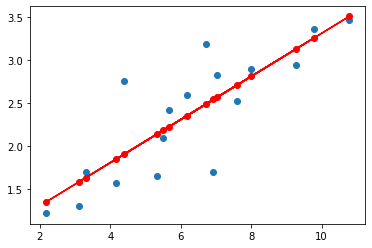

In [29]:
plt.scatter(x, y)
plt.plot(x, y_pred, 'ro-')

## Question 5: (Optional but Bonus point) In almost all applications, we update the slope and intercept through iteration

- Instead of putting the $\frac{\partial MSE}{\partial w_1} = 0$ $\frac{\partial MSE}{\partial w_0} = 0$
    - Initialize the $w_1$ and $w_0$ with arbitrary value, then update them by following Gradient Updating Rule:
    - $w_1 = w_1 - step*\frac{\partial MSE}{\partial w_1}$
    - $w_0 = w_0 - step*\frac{\partial MSE}{\partial w_0}$

In [30]:
import numpy as np

w_0 = np.random.randn()
w_1 = np.random.randn()
step = 0.01
epoch = 10000

x_mean = np.mean(x)
y_mean = np.mean(y)
xy_mean = np.mean([x_i * y_i for x_i, y_i in list(zip(x,y))])
x_squared_mean = np.mean([i**2 for i in x])

for _ in range(epoch):
    w_1 = w_1 - step * ((w_1 * x_squared_mean) + (w_0 * x_mean) - xy_mean)
    w_0 = w_0 - step * ((w_1 * x_mean) + w_0 - y_mean)
    
print(w_1)
print(w_0)

0.25163578806790715
0.7987952442669904


In [31]:
from scipy import stats

print(stats.linregress(x, y))

LinregressResult(slope=0.25163494428355404, intercept=0.7988012261753894, rvalue=0.8323917528894436, pvalue=3.391952640710616e-05, stderr=0.0432568020417479)
